## simple hand landmark inference

In [31]:
import cv2
import time
import numpy as np

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()
print(outNames)
img = cv2.imread('palm.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
tensor = img / 127.5 - 1.0
blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)


print(blob.shape)
time_start = time.time()
net.setInput(blob)
preds = net.forward(outNames)

print(f"spend time : {time.time() - time_start}")
for pred in preds:
    print(pred.shape)
    print(pred)
    print()

('Identity', 'Identity_1', 'Identity_2')
(1, 3, 224, 224)
spend time : 0.012955427169799805
(1, 63)
[[ 6.15600014e+01  1.79525024e+02 -7.26944208e-03  1.05022980e+02
   1.78844910e+02 -2.35644102e+00  1.37269485e+02  1.64272141e+02
  -7.34674168e+00  1.61872314e+02  1.44259552e+02 -1.17645149e+01
   1.81913605e+02  1.28508774e+02 -1.69434185e+01  1.24611259e+02
   1.18871712e+02 -1.91208534e+01  1.51054260e+02  8.02833862e+01
  -2.37940578e+01  1.66058487e+02  5.74945450e+01 -2.59115543e+01
   1.78017532e+02  3.95996399e+01 -2.76820755e+01  9.89765244e+01
   1.08267319e+02 -1.93883457e+01  1.17420670e+02  6.64731445e+01
  -2.63330879e+01  1.29082321e+02  4.04516258e+01 -2.97618351e+01
   1.39414551e+02  1.91233864e+01 -3.34708290e+01  7.32116852e+01
   1.05783615e+02 -1.83143272e+01  8.50020218e+01  6.65741348e+01
  -2.35014153e+01  9.41094742e+01  4.07012901e+01 -2.62362099e+01
   1.03378761e+02  2.01703453e+01 -2.94752808e+01  4.97371674e+01
   1.09679016e+02 -1.60185814e+01  5.02876

In [70]:
np.set_printoptions(suppress=True)

In [71]:
lms = preds[0].reshape(21, 3) 
print(lms)

[[ 61.56       179.52502     -0.00726944]
 [105.02298    178.84491     -2.356441  ]
 [137.26949    164.27214     -7.3467417 ]
 [161.87231    144.25955    -11.764515  ]
 [181.9136     128.50877    -16.943419  ]
 [124.61126    118.87171    -19.120853  ]
 [151.05426     80.28339    -23.794058  ]
 [166.05849     57.494545   -25.911554  ]
 [178.01753     39.59964    -27.682076  ]
 [ 98.976524   108.26732    -19.388346  ]
 [117.42067     66.473145   -26.333088  ]
 [129.08232     40.451626   -29.761835  ]
 [139.41455     19.123386   -33.47083   ]
 [ 73.211685   105.783615   -18.314327  ]
 [ 85.00202     66.574135   -23.501415  ]
 [ 94.109474    40.70129    -26.23621   ]
 [103.37876     20.170345   -29.47528   ]
 [ 49.737167   109.679016   -16.018581  ]
 [ 50.287643    77.07737    -20.36319   ]
 [ 53.25276     56.08789    -22.637543  ]
 [ 57.79891     37.339035   -25.644184  ]]


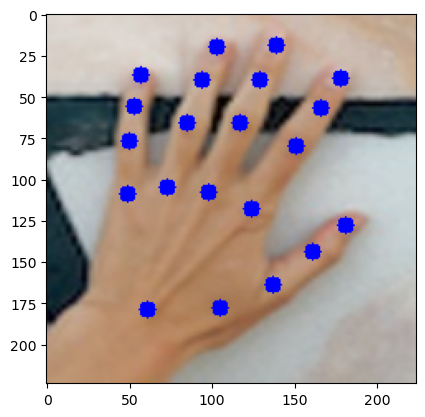

In [81]:
import matplotlib.pyplot as plt

def draw_circle(image, x, y):
    cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기
tmp = img.copy()

# 이미지에 원 그리기
for point in lms:
    x, y, _ = point
    draw_circle(tmp, x, y)

plt.imshow(tmp)
